In [1]:
import sys
import librosa
import numpy as np
import pandas as pd
import librosa.feature
import librosa.display
import scipy.io.wavfile
import matplotlib.pyplot as plt

from keras.models import load_model

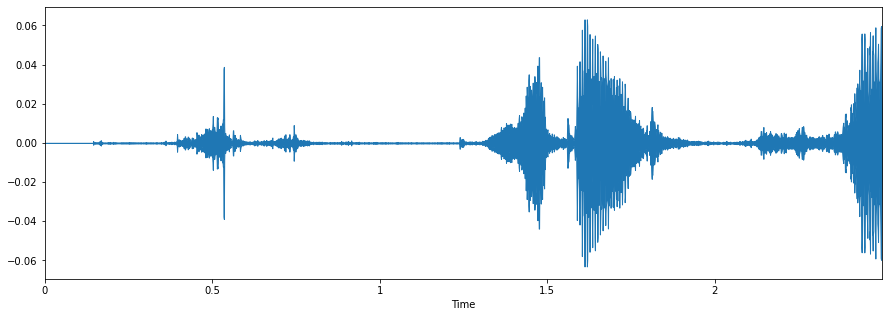

In [30]:
data, sample_rate = librosa.load('audio.wav', res_type='kaiser_fast', duration=2.5, sr=22050*2)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sample_rate)

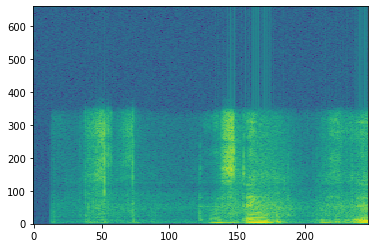

In [31]:
# sr,x = scipy.io.wavfile.read('audio.wav')

# Parameters: 10ms step, 30ms window
nstep = int(sample_rate * 0.01)
nwin  = int(sample_rate * 0.03)
nfft = nwin

window = np.hamming(nwin)

# will take windows x[n1:n2] generate and loop over n2 such that all frames fit within the waveform
nn = range(nwin, len(data), nstep)

X = np.zeros((len(nn), nfft//2))

for i,n in enumerate(nn):
    xseg = data[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [32]:
mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13), axis=0)
df = pd.DataFrame(data=mfccs).transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.905388,-61.544006,-49.574318,-45.157894,-43.476555,-43.508911,-46.697636,-48.653263,-47.504448,-49.647537,-49.765049,-47.365963,-46.624031,-47.952366,-49.673954,-49.080502,-48.228535,-49.36647,-50.013115,-48.153801,-47.969185,-47.580524,-48.615147,-45.657406,-40.109501,-37.473907,-37.613483,-37.657898,-38.44841,-37.891262,...,-46.674068,-44.703247,-44.103916,-43.664497,-41.551861,-41.710411,-41.024624,-35.746372,-31.999979,-30.405497,-30.611403,-28.531895,-28.953278,-31.738014,-30.775259,-33.481873,-34.220531,-31.053631,-28.693287,-29.968098,-32.204624,-35.753563,-36.408287,-34.304996,-34.60202,-37.76701,-36.466335,-34.098953,-32.459736,-29.812471,-28.787729,-26.757742,-24.381966,-23.237427,-21.804192,-19.980488,-20.312626,-19.33116,-17.012327,-14.297095


In [33]:
X = np.expand_dims(df, axis=2)

X

array([[[-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.905388],
        [-61.544006],
        [-49.574318],
        [-45.157894],
        [-43.476555],
        [-43.50891 ],
        [-46.697636],
        [-48.653263],
        [-47.504448],
        [-49.647537],
        [-49.76505 ],
        [-47.365963],
        [-46.62403 ],
        [-47.952366],
        [-49.673954],
        [-49.0805  ],
        [-48.228535],
        [-49.36647 ],
        [-50.013115],
        [-48.1538  ],
        [-47.969185],
        [-47.580524],
        [-48.615147],
        [-45.657406],
        [-40.1095  ],
        [-37.473907],
        [-37.613483],
        [-37.657898],
        [-38.44841 ],
        [-37.891262],
        [-37.273895],
        [-36.19079 ],
        [-35.982292],
        [-38.031624],
        [-38.033127],
        [-

In [34]:
model = load_model("model.h5")

In [35]:
prediction = np.argmax(model.predict(X), axis=-1)

print(prediction)

[9]
